In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Confusion matrix & metrics

In [129]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## (1) 데이터 준비

In [130]:
# classification 위한 임의의 데이터 생성 -> X: 2개 feature, y:binary 인 데이터 샘플 100개
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [131]:
model = LogisticRegression().fit(X,y)

y_score = model.decision_function(X)  
y_pred = model.predict(X)

# decision_function(): 판별함수 결과값 계산
# predict(): y_score가 양수이면 y=1, 음수이면 y=0으로 분류

C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [133]:
y_score

array([-3.9301727 , -0.87351526, -0.2727085 ,  2.42032566, -5.20595327,
       -5.41820936, -2.88453106,  2.0434207 , -6.18979205,  2.03772592,
        2.0020608 ,  2.41221035, -4.99226034,  2.66089998, -3.55139953,
        2.21674175, -5.08867748,  3.40029536,  1.34249674, -5.98115731,
        3.42203241, -4.31072232, -0.74015953,  3.1223118 ,  3.02392862,
       -4.66722824,  2.03743686, -1.00582315,  6.06371672, -3.23972185,
       -2.00048963,  1.96533244,  2.71942585, -3.44108764,  5.99150202,
        1.20293775, -0.84007543, -2.46171598,  0.48554122, -2.50082005,
        1.82954378,  1.22319527, -2.30055651, -1.59697975, -3.27977072,
       -2.6248344 , -1.79972757,  6.30668426, -1.03243047,  1.97814231,
       -0.06881959,  1.43467135, -2.84812251,  3.61679723, -2.26292921,
        1.43956924,  7.19612919,  2.34354109,  5.0225733 ,  0.680883  ,
        1.14836562,  2.00326607, -1.97892553, -2.24875151,  0.34427521,
       -4.71295838, -3.42413873,  2.30317546, -4.8229746 , -4.36

In [134]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [135]:
# 데이터프레임 형태로 확인해 보자

df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)

In [136]:
display(df.head(), df.tail())

,y_score,y_pred,y
0,10.757498,1.0,1.0
1,7.779290,1.0,1.0
2,7.196129,1.0,1.0
3,6.734392,1.0,1.0
4,6.616237,1.0,1.0


,y_score,y_pred,y
95,-5.304860,0.0,0.0
96,-5.418209,0.0,0.0
97,-5.569557,0.0,0.0
98,-5.981157,0.0,0.0
99,-6.189792,0.0,0.0


## (2) confusion matrix 생성

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [138]:
print(confusion_matrix(y, y_pred)) # TP FN FP TN

[[47  3]
 [ 2 48]]


In [139]:
print('accuracy score: ',accuracy_score(y, y_pred) )
print('precision score: ',precision_score(y, y_pred) )
print('recall score: ',recall_score(y, y_pred) )
print('f1 score: ',f1_score(y, y_pred) )

accuracy score:  0.95
precision score:  0.9411764705882353
recall score:  0.96
f1 score:  0.9504950495049505


In [140]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [141]:
# 로지스틱 회귀의 threshold(임계값) 를 0이 아닌 -2로 지정해 보자 
lower_threshold = model.decision_function(X) > -2

df2 = pd.DataFrame(np.vstack([y_score, lower_threshold, y]).T,
                  columns=["y_score", "y_hat", "y"])
df2 = df2.sort_values("y_score", ascending=False).reset_index(drop=True)


In [142]:
display(df2[(df2['y_score']> -2.5) & (df2['y_score']<-1.5)])

,y_score,y_hat,y
59,-1.596980,1.0,0.0
60,-1.799728,1.0,0.0
61,-1.978926,1.0,0.0
62,-1.988637,1.0,0.0
63,-2.000490,0.0,0.0
64,-2.248752,0.0,0.0
65,-2.262929,0.0,0.0
66,-2.288382,0.0,0.0
67,-2.300557,0.0,0.0
68,-2.461716,0.0,0.0


In [143]:
print(confusion_matrix(y, lower_threshold))

[[37 13]
 [ 0 50]]


In [144]:
print(classification_report(y, lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        50
           1       0.79      1.00      0.88        50

    accuracy                           0.87       100
   macro avg       0.90      0.87      0.87       100
weighted avg       0.90      0.87      0.87       100



# 2. ROC, PR 곡선 그리기

In [145]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [146]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [147]:
model = LogisticRegression().fit(X,y)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [148]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [149]:
print(roc_auc)

0.9576046634870164


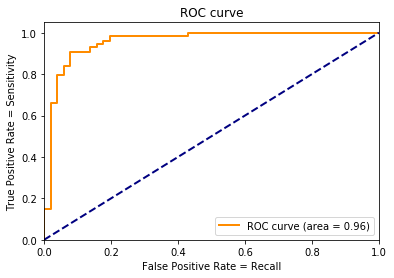

In [150]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [151]:
print(confusion_matrix(y_test, y_pred))

[[47  4]
 [ 7 67]]


In [152]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature


In [153]:
precision, recall, _ = precision_recall_curve(y_test, y_score) #pr 커브

In [154]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.96


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

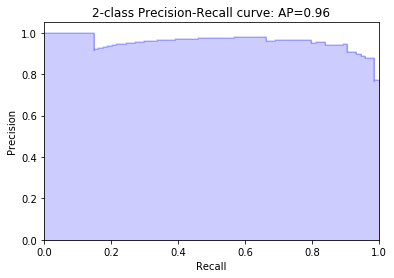

In [155]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [156]:
#둘의 AUC가 같아서 ROC 선택!

# 3. Cross Validation

In [157]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [158]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)

for train_index, test_index in cv.split(X):
    print(X[train_index], y[test_index])
    
# cv.split(X)는 X를 k-fold로 나눈 뒤 각 fold에서의 (train_index, test_index)를 반환하는 iterable

[[ 1.72296294e+00  1.24283700e+00]
 [ 7.12463464e-01 -8.46126795e-01]
 [-5.39269536e-01 -5.07480865e-02]
 [ 1.24454480e+00  1.14476211e+00]
 [ 1.50996282e-01 -1.52372086e+00]
 [ 2.25365926e+00  8.81498878e-01]
 [-1.53232255e+00 -4.76587107e-01]
 [-1.13571511e+00  7.39290415e-01]
 [ 1.36135584e+00 -1.60965415e+00]
 [ 1.44251947e+00 -8.17344356e-01]
 [ 1.55148829e+00  5.97282518e-01]
 [ 5.67947395e-01  1.02392676e+00]
 [-1.38545824e+00 -2.55869034e-01]
 [ 5.76614937e-01  1.16950708e+00]
 [ 5.05862639e-02  4.60179732e-01]
 [ 6.77462377e-01 -1.24990587e+00]
 [ 1.00850163e+00 -1.58654747e+00]
 [-1.04542054e+00  1.69566720e-01]
 [-2.72284173e-01  6.50331909e-01]
 [ 7.54421728e-01  1.19217690e+00]
 [-3.55910329e-01  4.61011132e-01]
 [-8.03551048e-01 -1.63580540e+00]
 [ 1.44630208e+00 -1.26527636e+00]
 [-6.32368526e-01 -2.34751759e-02]
 [ 8.63379871e-01  9.76307334e-01]
 [ 1.91740689e+00  1.28203450e+00]
 [ 1.42520242e+00 -1.58476234e+00]
 [-8.59127457e-02  1.61951108e-02]
 [ 1.00342396e+00 -1

In [159]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션

In [160]:
scores = cross_val_score(LogisticRegression(), X, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores # 각 fold에 대한 score

C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.95, 0.92, 0.91, 0.91, 0.9 ])

In [161]:
scores = cross_val_score(LogisticRegression(), X, y) 
scores 
# cross_val_score의 기본값은 k=3

C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.89820359, 0.91616766, 0.95180723])

In [162]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
scores
# cross_val_score는 기본적으로 분류 모델에 대해 StratifiedKfold 사용

C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\djyj1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.9009901 , 0.93069307, 0.88      , 0.96969697, 0.94949495])

In [163]:
display(scores.mean(), scores.var()) # 교차검증 점수들의 평균과 분산 확인

0.9261750175017502

0.0010449609407785466

# 4. Grid Search

In [164]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [165]:
iris_data = load_iris()

In [166]:
X_train, X_test, y_train,y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2, random_state = 121)

In [167]:
dtree = DecisionTreeClassifier()

In [168]:
parameters = {'max_depth':[1,2,3,4], 'min_samples_split':[2,3,4]}

In [169]:
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

In [170]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             pre_dispatch=

In [171]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

In [172]:
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,10,0.700,0.7,0.700
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,10,0.700,0.7,0.700
2,"{'max_depth': 1, 'min_samples_split': 4}",0.700000,10,0.700,0.7,0.700
3,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,6,0.925,1.0,0.950
4,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,6,0.925,1.0,0.950
5,"{'max_depth': 2, 'min_samples_split': 4}",0.958333,6,0.925,1.0,0.950
6,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.950
7,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.950
8,"{'max_depth': 3, 'min_samples_split': 4}",0.975000,1,0.975,1.0,0.950
9,"{'max_depth': 4, 'min_samples_split': 2}",0.950000,9,0.925,1.0,0.925


In [173]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [174]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


In [ ]:
#GridSearchCV 최적 파라미터는 'max_depth': 3, 'min_samples_split': 2, 'max_depth': 3, 'min_samples_split': 3, 'max_depth': 3, 'min_samples_split': 4로 나왔고 이는 1번에서 선택한 모델보다 정확도가 높다!